In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from utils.constants import SEASON
from utils.general import get_data_path

In [2]:
players_season_data = pd.read_csv(get_data_path(SEASON, 'players_season_data.csv'))
players_season_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 781 entries, 0 to 780
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   player_id              781 non-null    int64  
 1   web_name               781 non-null    object 
 2   team_id                781 non-null    int64  
 3   element_type           781 non-null    int64  
 4   points_per_game        781 non-null    float64
 5   total_points           781 non-null    int64  
 6   minutes                781 non-null    int64  
 7   starts                 781 non-null    int64  
 8   goals_scored           781 non-null    int64  
 9   assists                781 non-null    int64  
 10  yellow_cards           781 non-null    int64  
 11  red_cards              781 non-null    int64  
 12  clean_sheets           781 non-null    int64  
 13  goals_conceded         781 non-null    int64  
 14  saves                  781 non-null    int64  
 15  bps   

In [3]:
def scatter_with_lr(x, y, xlabel:str, ylabel:str, c = None, alpha:float=1.0):
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.scatter(
        x,
        y,
        c=c,
        alpha=alpha,
    )

    # Linear regression fit
    slope, intercept = np.polyfit(x, y, 1)
    plt.plot(x, slope * x + intercept, color='red', label='Linear Regression')

    plt.legend()
    plt.show()

In [4]:
import statsmodels.api as sm

def scatter_with_loess(x, y, xlabel:str, ylabel:str, c = None, alpha:float=1.0, frac:float=0.66):
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.scatter(
        x,
        y,
        c=c,
        alpha=alpha,
    )

    # LOESS curve
    lowess = sm.nonparametric.lowess
    
    # Sort points by x for plotting the LOESS curve correctly
    sorted_indices = np.argsort(x)
    loess_fit_sorted = lowess(y[sorted_indices], x[sorted_indices], frac=frac)


    plt.plot(loess_fit_sorted[:, 0], loess_fit_sorted[:, 1], color='red', label=f'LOESS (frac={frac})')

    plt.legend()
    plt.show()


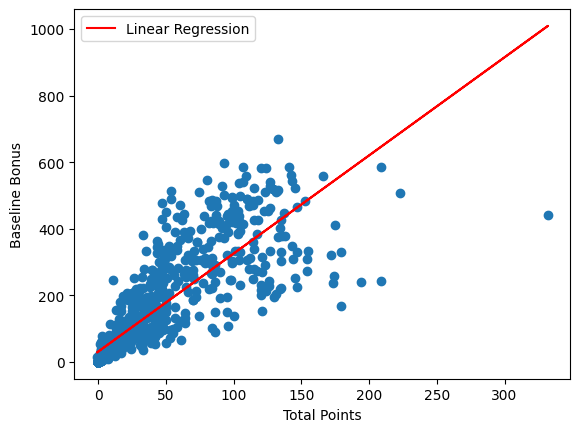

In [5]:
scatter_with_lr(
    players_season_data['total_points'],
    players_season_data['baseline_bps'],
    'Total Points',
    'Baseline Bonus',
)

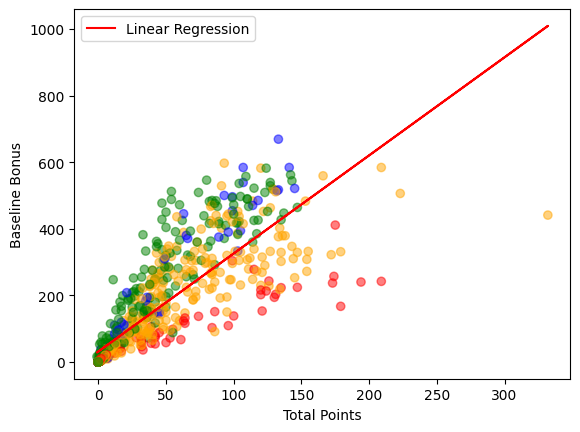

In [7]:
# Map positions to distinct colors
players_season_data['position'] = players_season_data['element_type'].apply(
    lambda x: 'Goalkeeper' if x == 1 else
              'Defender' if x == 2 else
              'Midfielder' if x == 3 else
              'Forward'
)

position_colors = {
    'Goalkeeper': 'blue',
    'Defender': 'green',
    'Midfielder': 'orange',
    'Forward': 'red'
}
colors = players_season_data['position'].map(position_colors)

scatter_with_lr(
    players_season_data['total_points'],
    players_season_data['baseline_bps'],
    'Total Points',
    'Baseline Bonus',
    c=colors,
    alpha=0.5
)

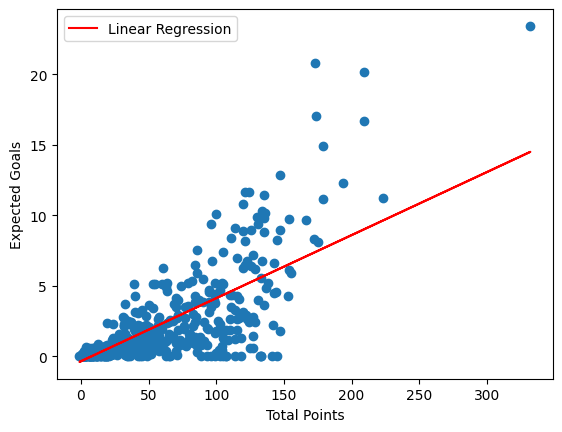

In [8]:
scatter_with_lr(
    players_season_data['total_points'],
    players_season_data['xG'],
    'Total Points',
    'Expected Goals',
)

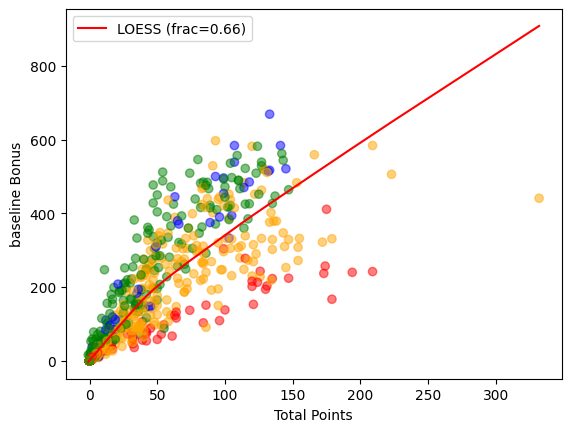

In [9]:
scatter_with_loess(
    players_season_data['total_points'],
    players_season_data['baseline_bps'],
    'Total Points',
    'baseline Bonus',
    c=colors,
    alpha=0.5,
)

<Axes: >

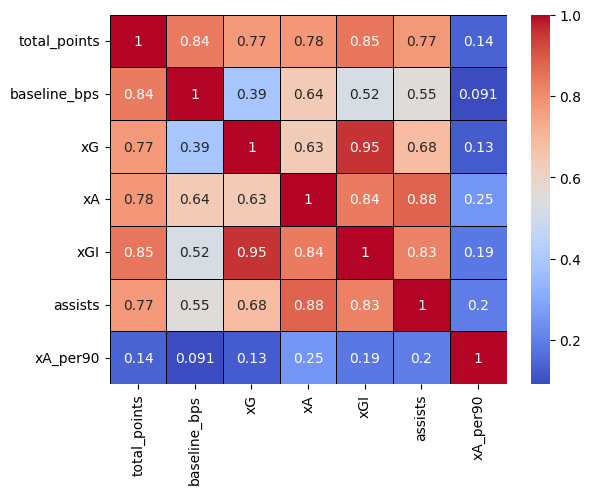

In [10]:
# Correlation heatmap
numerical_season = players_season_data.select_dtypes(include=[np.number])
numerical_season = numerical_season[['total_points', 'baseline_bps', 'xG', 'xA', 'xGI', 'assists', 'xA_per90']]
sns.heatmap(
    numerical_season.corr(),
    annot=True,
    cbar=True,
    cmap='coolwarm',
    linewidths=0.5,
    linecolor='black',
)


## GW by GW merged with team stats

In [2]:
import pandas as pd
import numpy as np
# Correlation heatmap
df = pd.read_csv("temp.csv")
numerical_df = df.select_dtypes(include=[np.number])

element_types = {
    1: "Goalkeepers",
    2: "Defenders",
    3: "Midfielders",
    4: "Forwards"
}

for element_type, position_name in element_types.items():
    print(f"|Correlation with total_points for {position_name}:")
    position_df = numerical_df[numerical_df['element_type'] == element_type]
    if not position_df.empty:
        pd.set_option('display.max_rows', None)
        display(position_df.corr()["total_points"].sort_values(ascending=False))
        pd.reset_option('display.max_rows')
    else:
        print(f"No data found for {position_name}")
    print("\n" + "="*50 + "\n")

|Correlation with total_points for Goalkeepers:


total_points                        1.000000
clean_sheets                        0.836623
minutes                             0.713423
in_starting_xi                      0.712936
total_pass_completion_percentage    0.623639
total_points_season                 0.616207
bps_season                          0.613418
minutes_season                      0.607288
starts_season                       0.607059
baseline_bps_season                 0.602270
clean_sheets_season                 0.589037
saves_season                        0.588394
xGC_season                          0.569879
goals_conceded_season               0.561103
yellow_cards_season                 0.490502
xGC                                 0.482076
points_per_game_season              0.436472
xGI_season                          0.416134
xA_season                           0.403603
penalties_saved_season              0.347423
assists_season                      0.281227
xGI_per90_season                    0.269418
xA_per90_s



|Correlation with total_points for Defenders:


total_points                        1.000000
clean_sheets                        0.797949
minutes                             0.606886
in_starting_xi                      0.583466
total_pass_completion_percentage    0.554913
total_points_season                 0.517950
bps_season                          0.510939
clean_sheets_season                 0.495593
minutes_season                      0.478624
starts_season                       0.478050
baseline_bps_season                 0.477800
points_per_game_season              0.465051
xGI_season                          0.455090
goals_scored                        0.448371
xGI                                 0.438347
xG_season                           0.419530
npg                                 0.408718
npxgi                               0.408254
xGC_season                          0.404769
tpa                                 0.398579
goals_conceded_season               0.389686
shots                               0.381768
xA_season 



|Correlation with total_points for Midfielders:


total_points                        1.000000
goals_scored                        0.794087
npg                                 0.736983
xGI                                 0.694895
npxgi                               0.673302
minutes                             0.639789
SoT                                 0.632852
xG                                  0.626022
shots                               0.599026
in_starting_xi                      0.597530
npxG                                0.594184
total_points_season                 0.582412
SiB                                 0.573131
tpa                                 0.562406
bps_season                          0.562037
points_per_game_season              0.554745
xGI_season                          0.552480
assists                             0.544577
total_pass_completion_percentage    0.538199
xG_season                           0.521412
xA_season                           0.521344
minutes_season                      0.519352
goals_scor



|Correlation with total_points for Forwards:


total_points                        1.000000
goals_scored                        0.905441
npg                                 0.842369
xGI                                 0.745804
SoT                                 0.734495
xG                                  0.716083
npxgi                               0.706769
minutes                             0.690217
npxG                                0.663790
shots                               0.653072
in_starting_xi                      0.645151
tpa                                 0.639974
SiB                                 0.631731
total_points_season                 0.592661
bps_season                          0.587275
goals_scored_season                 0.577951
xGI_season                          0.575080
minutes_season                      0.571866
points_per_game_season              0.571321
xG_season                           0.567564
starts_season                       0.566753
baseline_bps_season                 0.551943
clean_shee

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26268 entries, 0 to 26267
Data columns (total 77 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   player_id                         26268 non-null  int64  
 1   minutes                           26268 non-null  int64  
 2   in_starting_xi                    26268 non-null  int64  
 3   was_home                          26268 non-null  bool   
 4   goals_scored                      26268 non-null  int64  
 5   assists                           26268 non-null  int64  
 6   goals_conceded                    26268 non-null  int64  
 7   clean_sheets                      26268 non-null  int64  
 8   xG                                26268 non-null  float64
 9   xA                                26268 non-null  float64
 10  xGC                               26268 non-null  float64
 11  xGI                               26268 non-null  float64
 12  tota